In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
#one_hot is one hard encoded 
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [10]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [11]:
#55000 and 784 pixal 
mnist.train.images.shape

(55000, 784)

In [12]:
mnist.train.num_examples

55000

In [13]:
mnist.validation.num_examples

5000

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

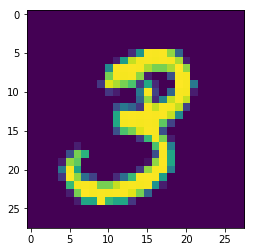

In [16]:
plt.imshow(mnist.train.images[1].reshape(28,28))

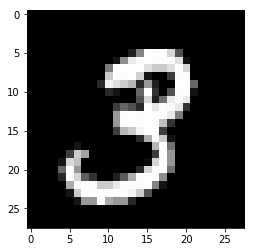

In [22]:
# gray scale image 
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray')

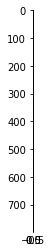

In [18]:
# we can't as pixal are only in linear order x=0
plt.imshow(mnist.train.images[1].reshape(784,1))


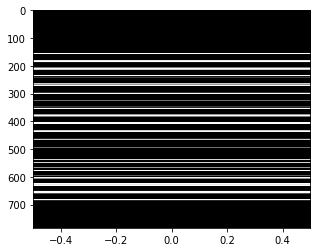

In [28]:
# check color of each(gray) pixal  with aspect ratio 0.01
plt.imshow(mnist.train.images[1].reshape(784,1), aspect=0.001,cmap='gist_gray')

# Create the Model

In [34]:
X = tf.placeholder(tf.float32,shape=[None,784])

In [35]:
W =tf.Variable(tf.zeros([784,10])) # input 784 and 10 output so 784x10 weight

In [36]:
# bais
b= tf.Variable(tf.zeros(10))

In [37]:
y = tf.matmul(X,W) +b

In [38]:
y

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

# loss and  Optimizer

In [48]:

#label data y #  10 as one_hot true means for 2 y_true is [0 0 1 0 0 0 0 0 0 0 ]
y_true = tf.placeholder(tf.float32 ,shape=[None,10])

In [51]:
#cost Entropy
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y))

In [147]:
# optimized weight 
# less learning rate more accuray
# less learning rate high time comsuming
# check leaning rate on smaller data with [0.01 , 0.03,0,09 ... ]  three time to pick best  
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.3)

In [148]:
train = optimizer.minimize(cross_entropy)

# CREATE SESSION 

In [149]:
#tf.global_variables_initializer() in a session will your variables hold the values you told them to hold when you declare them
# W =tf.Variable(tf.zeros([784,10]) ,b
init = tf.global_variables_initializer()

In [152]:
with tf.Session() as sess:
    sess.run(init)
    #train model for optimized Gradient
    # trainging with 10 step
    for step in range(1000):
        batch_x , batch_y = mnist.train.next_batch(100)
        # feed x batch and y_true  for train model
        sess.run(train,feed_dict={X:batch_x,y_true:batch_y})
    
    #cross validation of train 
    #argmax Returns the index with the largest value across axes of a tensor
    matches = tf.equal(x=tf.argmax(y_true,axis=1),y=tf.argmax(y,axis=1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    print('train')
    print(sess.run(fetches=acc,feed_dict={X:mnist.train.images,y_true:mnist.train.labels}))
    
    print('cross validation')
    print(sess.run(fetches=acc,feed_dict={X:mnist.validation.images,y_true:mnist.validation.labels}))
    
    print('test')
    print(sess.run(fetches=acc,feed_dict={X:mnist.test.images,y_true:mnist.test.labels}))
    
        

train
0.9107091
cross validation
0.918
test
0.9146
